<a href="https://colab.research.google.com/github/dishantzaveri/SynapseMLTasks/blob/week2/dishantweek2synapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.\4/*

In [134]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

In [135]:

import pandas as pd

housing_data_path = "/content/gdrive/My Drive/synapse_w2/housing_data.csv"
classified_data_path = "/content/gdrive/My Drive/synapse_w2/classified_data.txt"
titanic_data_path = "/content/gdrive/My Drive/synapse_w2/titanic_data.csv"


# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [136]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

**Read housing_data.csv using pandas and call head() to show first few records.**

In [137]:
housing_data_df = pd.read_csv(housing_data_path)
titanic_data_df = pd.read_csv(titanic_data_path)


housing_data_df_first_5 = housing_data_df.head(5)
print(housing_data_df_first_5)

   Avg. Area Income  ...                                            Address
0      79545.458574  ...  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1      79248.642455  ...  188 Johnson Views Suite 079\nLake Kathleen, CA...
2      61287.067179  ...  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3      63345.240046  ...                          USS Barnett\nFPO AP 44820
4      59982.197226  ...                         USNS Raymond\nFPO AE 09386

[5 rows x 7 columns]


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [138]:
housing_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [139]:
desc = housing_data_df.describe()
desc

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [140]:
for col in housing_data_df:
    print(col)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf3c103d50>]],
      dtype=object)

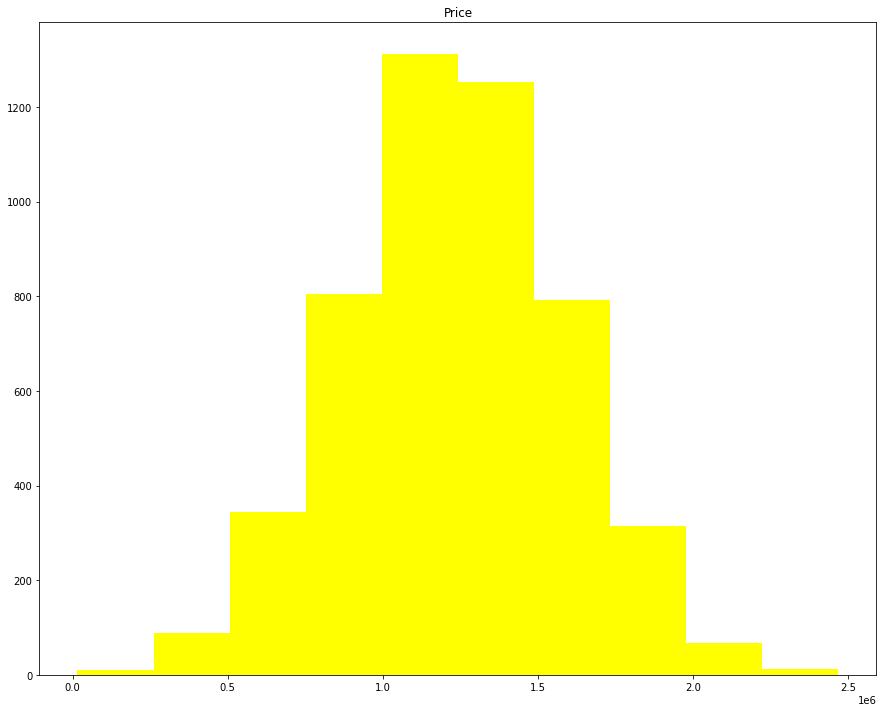

In [141]:
housing_data_df.hist(column='Price',grid=False, figsize=(15,12), color='yellow')

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [142]:
corr = housing_data_df.corr()
print (corr)

                              Avg. Area Income  ...     Price
Avg. Area Income                      1.000000  ...  0.639734
Avg. Area House Age                  -0.002007  ...  0.452543
Avg. Area Number of Rooms            -0.011032  ...  0.335664
Avg. Area Number of Bedrooms          0.019788  ...  0.171071
Area Population                      -0.016234  ...  0.408556
Price                                 0.639734  ...  1.000000

[6 rows x 6 columns]


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [143]:
list(housing_data_df)

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [144]:
# This code should print (5000, 5) and (5000,1) if everything is correct
numeric_list=housing_data_df.select_dtypes(include=np.number)
X=pd.DataFrame(numeric_list)
y=pd.DataFrame(housing_data_df['Price'])
X=X.drop(columns=['Price'], axis=1)

In [145]:
print(X.shape)
print(y.shape)

(5000, 5)
(5000, 1)


In [146]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [147]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Test-train split

**Import train_test_split function from scikit-learn**

In [148]:
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [149]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3500, 5) (1500, 5) (3500, 1) (1500, 1)


**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [150]:
print(X_train.shape, X_train.size, X_test.shape, X_test.size)
print(y_train.shape, y_train.size, y_test.shape, y_test.size)


(3500, 5) 17500 (1500, 5) 7500
(3500, 1) 3500 (1500, 1) 1500


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [151]:
# add code for imports here
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here

lm=LinearRegression()



**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [152]:
# add code here
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [153]:
# add code here
predictions=lm.predict(X_test)
print(type(predictions) , predictions.size)


<class 'numpy.ndarray'> 1500


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

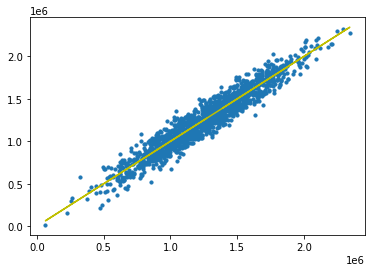

In [154]:
# add code here
predict=lm.predict(X_test)
plt.plot(predict,predict, color='y')
plt.scatter(x=predictions, y=y_test, s=10)
plt.show()



**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [155]:
# add code here
round(metrics.r2_score(predictions,y_test), 3)


0.91

# 2) K-nearest neighbor Classification

### Import packages and dataset

In [156]:
# import numpy, pandas, matplotlib, seaborn
# add code here

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [157]:
# add code here
df=pd.read_csv(classified_data_path , index_col=0)
df.head()



,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [158]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [159]:
# add code here
df.describe()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [160]:
# add code here
col=df.columns
print(col)



Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

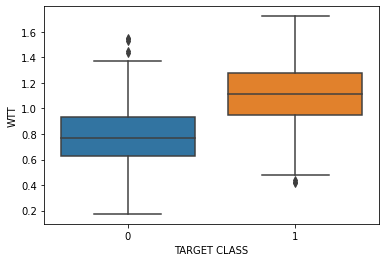

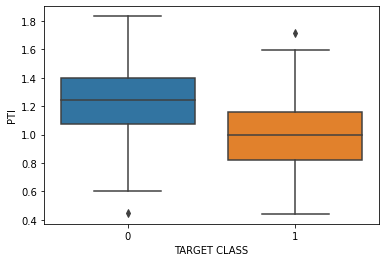

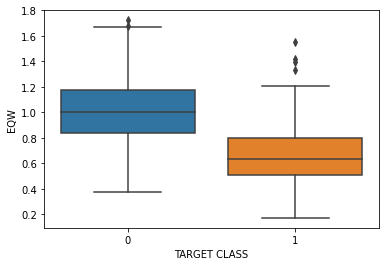

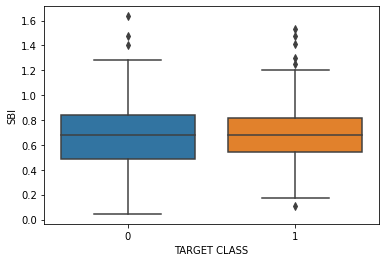

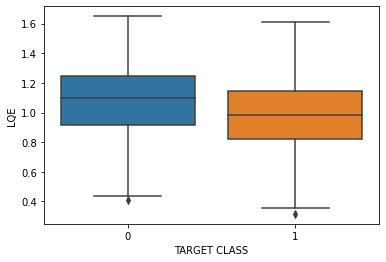

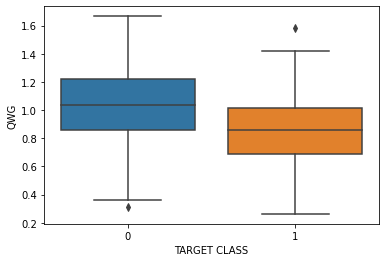

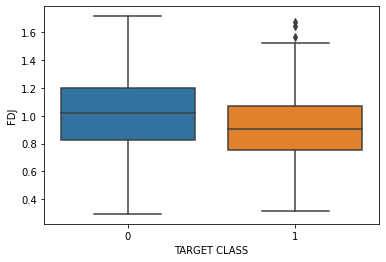

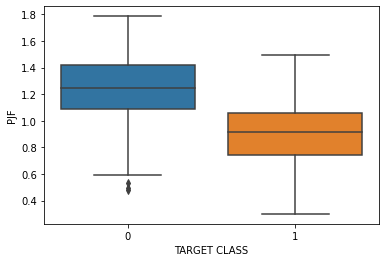

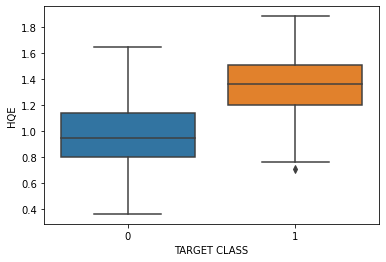

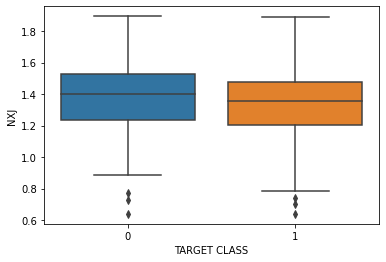

In [161]:
# add code here
features=col[:-1]
for i in features:
    sns.boxplot(data=df, x="TARGET CLASS",y=i)
    plt.show()


### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [162]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [163]:
# add code here
scaler.fit(df[features])
arr=scaler.transform(df[features])
print(arr)

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [164]:
# add code here
df_feat=pd.DataFrame(arr, columns = features)
df_feat.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [165]:
# add code here
X=df_feat
y=df['TARGET CLASS']


**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [166]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
# add code here


### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [167]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
n=KNeighborsClassifier(n_neighbors=1)
n.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [168]:
# add code here
pred= n.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [169]:
# add code here
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       148
           1       0.93      0.90      0.92       152

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [170]:
# add code here
print(round(report["accuracy"],3))


0.947


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [171]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here

acc_list=[]
k_list=range(1,61)

for i in range(60):
    n=KNeighborsClassifier(n_neighbors=i+1)
    n.fit(X_train,y_train)
    pred= n.predict(X_test)
    report=classification_report(y_test, pred, output_dict=True)
    acc_list.append(round(report["accuracy"],3))
    


**Plot a graph of K value vs Accuracy**

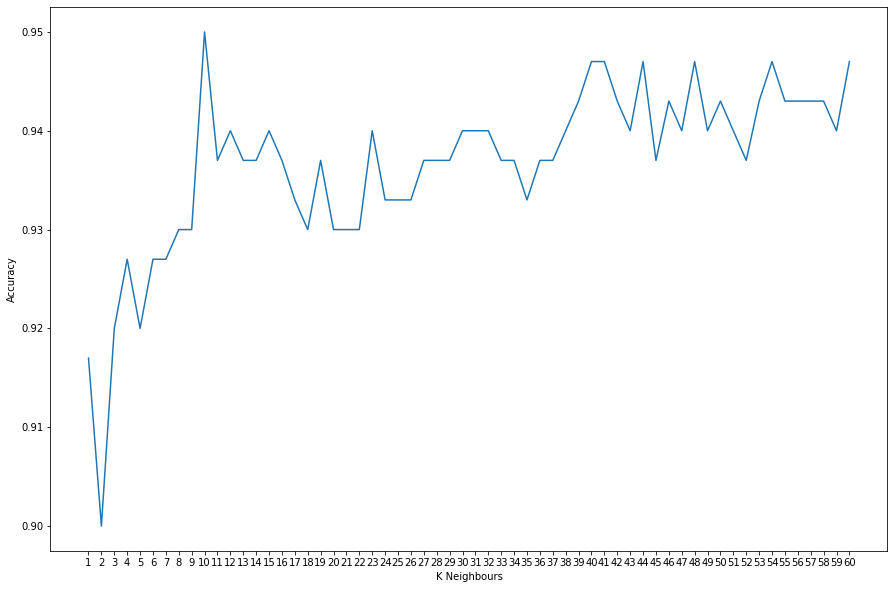

In [172]:
# add code here
plt.figure(figsize=(15,10))
plt.plot(k_list, acc_list)
plt.xticks(range(1,61))
plt.xlabel("K Neighbours")
plt.ylabel("Accuracy")
plt.show()



**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [173]:
# add code here 

In [174]:
max_acc=max(acc_list)
k=acc_list.index(max_acc)+1 
print(k,max_acc)

10 0.95


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [175]:
#write code here
df=pd.read_csv(titanic_data_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [176]:

titanic_data_df['male'] = titanic_data_df['Sex'] == 'male'

In [177]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new


def preprocessing_t1(train_df):
    train_df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
    
    df_nan = pd.DataFrame()
    
    nan_dict = {}
    for i in train_df.columns:
      nan_dict[i] = (train_df[i].isnull().sum()/len(train_df))*100
    
    df_nan["Column"] = nan_dict.keys()
    df_nan["nan_percentage"] = nan_dict.values()
    
    train_df.drop(["Cabin"], axis=1, inplace=True)
    
    train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
    train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
    train_df["Family_members"] = train_df["SibSp"] + train_df["Parch"]
    train_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
    
    train_df["Age"] = normalize(train_df["Age"])
    train_df["Fare"] = normalize(train_df["Fare"])
    train_df["Family_members"] = normalize(train_df["Family_members"]) 
    
    df_ohe = pd.get_dummies(train_df, columns=["Pclass", "Sex", "Embarked"])
    return df_ohe
titanic_df=preprocessing_t1(titanic_data_df)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [178]:
#write code here
y=titanic_df['Survived'].values

<b>remove the y_label (survived) from the dataframe</b>

In [179]:
#write code here
X=titanic_df[['Age', 'Fare', 'male']].values

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [180]:
#write code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [181]:
#write code here
#write code here
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=50, shuffle=True)
test_acc=[]
train_acc=[]
model = RandomForestClassifier(n_estimators=300, max_depth=15)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    test_acc.append(model.score(X_test, y_test))
    train_acc.append(model.score(X_train, y_train))

<b>print the test accuracy and train accuracy here</b>

In [182]:
#write code here
print('test accuracy: ', max(test_acc))
print('train accuracy:', train_acc[test_acc.index(max(test_acc))])


test accuracy:  0.9444444444444444
train accuracy: 0.9782359679266895
